## Title:Mall Customer Segmentation


### Bussiness Objective:Create Customer cluster to identify different type of customers.

In [1]:
#Importing Library
import numpy as np                                                       #for array and numerical data calculation
import pandas as pd                                                      #for making dataframe and loding data
import matplotlib.pyplot as plt                                          #for visualization
import seaborn as sns                                                    #for visualization

from sklearn import preprocessing,metrics                                #for model precpocessing steps 
from sklearn.cluster import KMeans , AgglomerativeClustering ,DBSCAN     #for different types of clustering methods
import scipy.cluster.hierarchy as sch                                  #for plotting dendogram

import warnings                                                          # to filter out warnings
warnings.simplefilter(action='ignore')

In [2]:
#Loading Dataset 
M_cust=pd.read_csv("C:/Users/acer/Downloads/DS3_C6_S3_MallCustomers_Data_Project.csv")

#Dataset preview
M_cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Checking for null values
M_cust.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No null values found.

In [4]:
#Summary of data
M_cust.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
#Checking Datatypes
M_cust.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
#Changing object datatype to category
M_cust['Gender']=M_cust['Gender'].astype('category')
M_cust.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [7]:
#Checking shape 
M_cust.shape

(200, 5)

## EDA

### Univariate

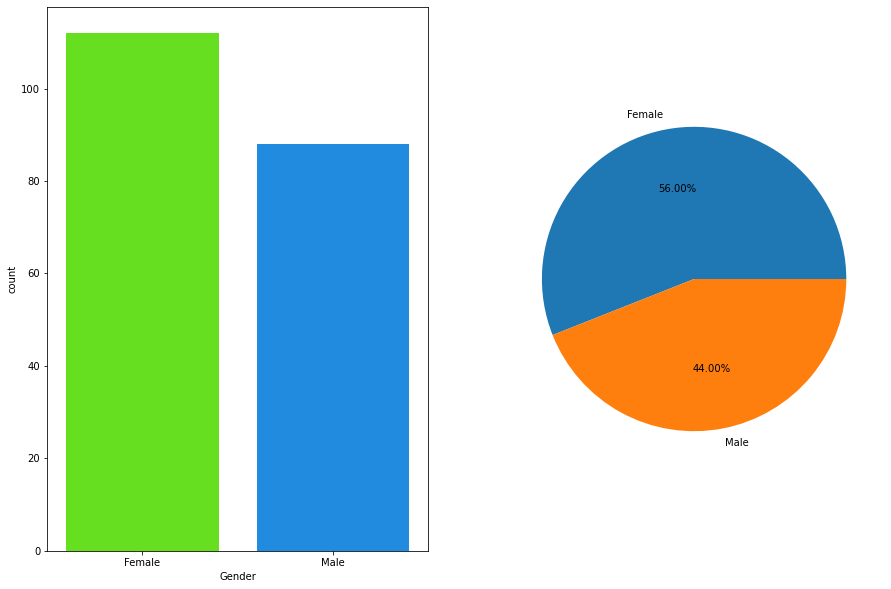

In [8]:
#Count of Male and Female
fig,ax=plt.subplots(1,2,figsize=(15,10))
sns.countplot(x=M_cust['Gender'],ax=ax[0],palette='gist_rainbow')
plt.pie(x=M_cust['Gender'].value_counts(),labels=M_cust['Gender'].value_counts().index,autopct='%.2f%%');

Feamle customer are more as compared to male one.

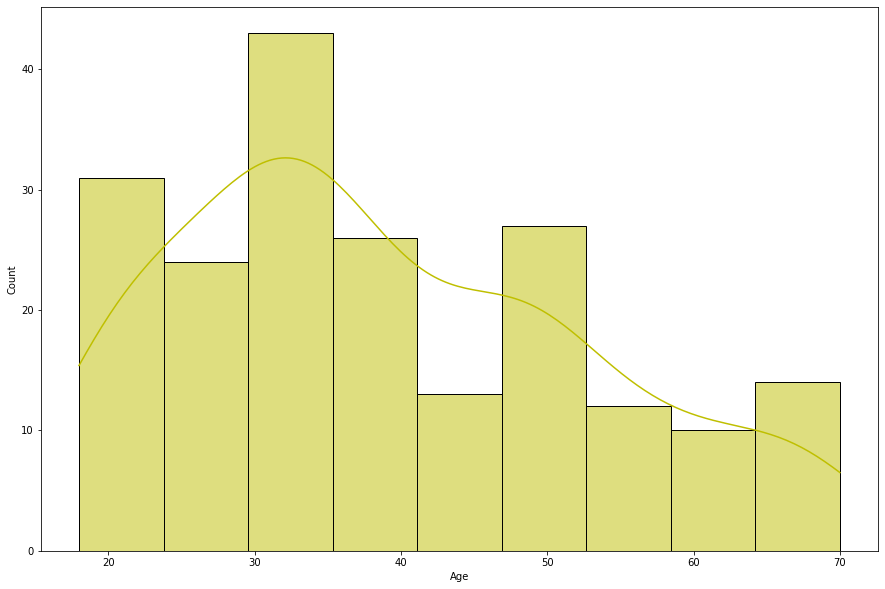

In [9]:
#Count according to Age
fig,ax=plt.subplots(figsize=(15,10))
sns.histplot(x=M_cust['Age'],color='y',kde=True);

Customers age b/w 30-35 are the highest followed by age group 18-25.

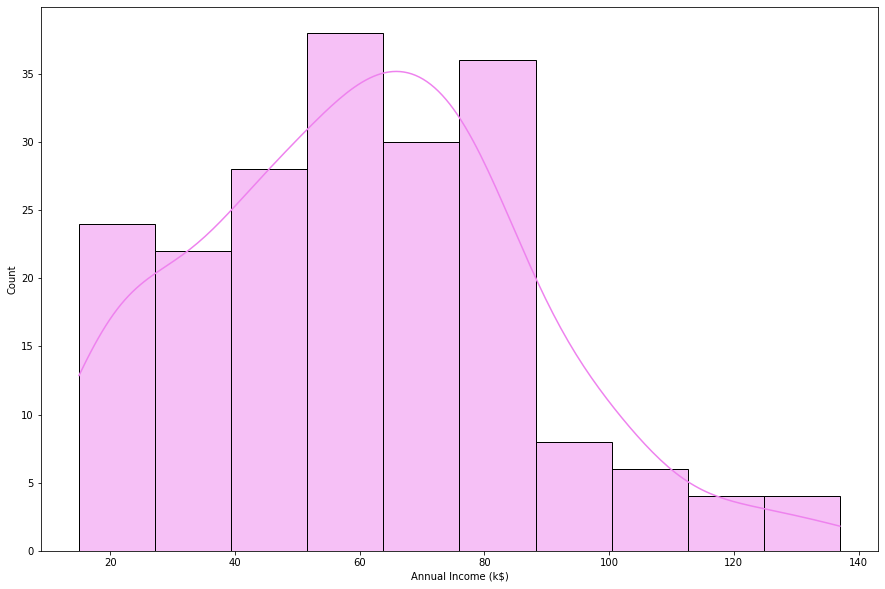

In [10]:
#Count according to Income
fig,ax=plt.subplots(figsize=(15,10))
sns.histplot(x=M_cust['Annual Income (k$)'],color='violet',kde=True);


Customers having annual income b/w 55K-65K are the highest foolowed by annual income 75K-85K.

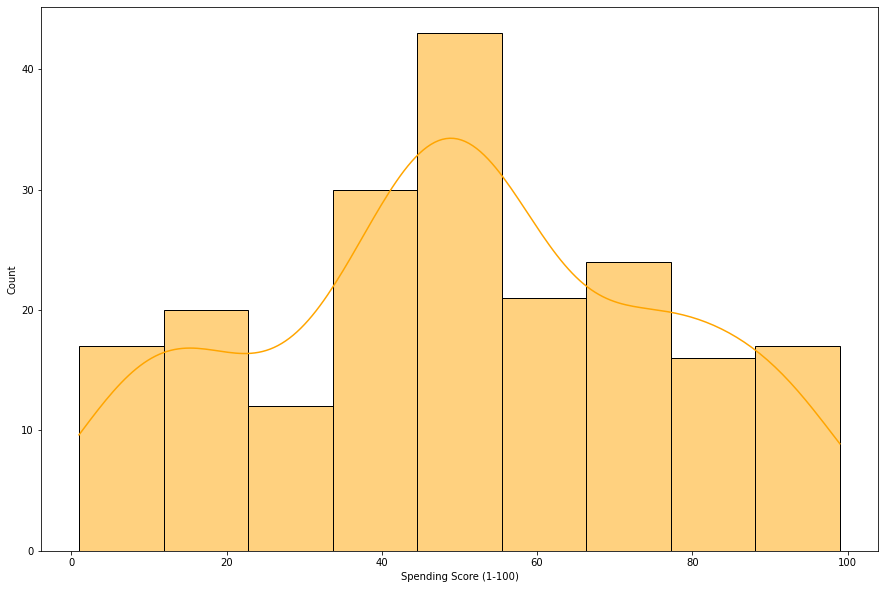

In [11]:
#Spending score
fig,ax=plt.subplots(figsize=(15,10))
sns.histplot(x=M_cust['Spending Score (1-100)'],color='orange',kde=True);

Spending score of customers b/w 45-55 are the highest in number.

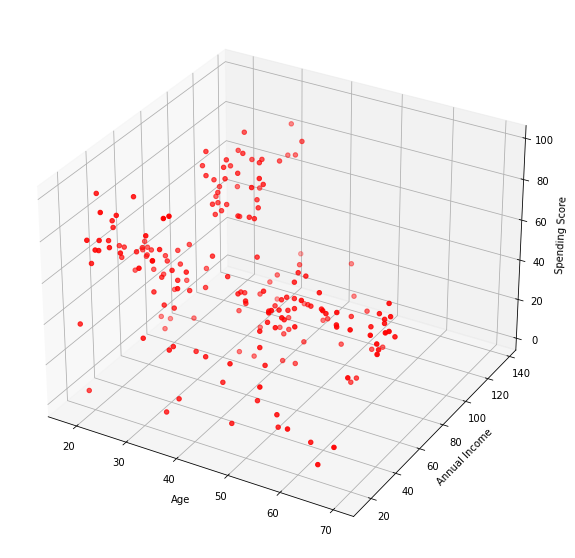

In [12]:
fig=plt.figure(figsize=(15,10))
ax    =plt.axes(projection='3d')

ax.scatter3D(M_cust['Age'],M_cust['Annual Income (k$)'],M_cust['Spending Score (1-100)'],color='red')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

plt.show()

#### Observation:

Annual Income is more for customer age b/w 30-40.

Spending score is more for customers age b/w 20-30.

More customers are found b/w spending score 40-60 having annual income b/w 40k-60k

In [13]:
M_cust=M_cust.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})

In [14]:
M_cust.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Customer ID is irrelevant column so we can drop it.

In [15]:
X=M_cust.drop('CustomerID',axis=1)
X.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [16]:
X['Gender']=M_cust['Gender']=='Male'
X.head()

,Gender,Age,Annual_Income,Spending_Score
0,True,19,15,39
1,True,21,15,81
2,False,20,16,6
3,False,23,16,77
4,False,31,17,40


In [17]:
X=X.values

There is no huge difference in the scales of Age, Annual Income and Spending Score features, so ne need to scale this dataset.

In [18]:
X1=M_cust.iloc[:,[3,4]].values

### Going to implement various clustering model.

### K-Means Clustering

### Finding optimal value of K(No. of clusters)

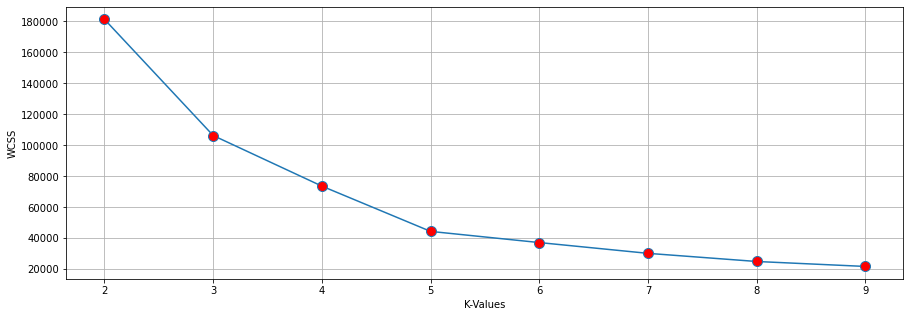

In [19]:
distortion=[]

for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=22)
    kmeans.fit(X1)
    
    distortion.append(kmeans.inertia_)
    
fig=plt.figure(figsize=(15,5))
plt.plot(range(2,10),distortion,marker='o',markerfacecolor='red',markersize=10)
plt.grid(True)
plt.xlabel("K-Values")
plt.ylabel("WCSS")
plt.show()

Shortlisting 3,4,5,6 as value of k from elbow curve.

Now we will find silhouette score for them.

### Silhouette score

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [ 3,4,5,6]

for k in range_n_clusters:

    kmeans= KMeans(n_clusters=k, random_state=22)
    cluster_labels = kmeans.fit_predict(X1)
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5393922132561455


As for k=5 silhoutte score is best so will take 5 clusters.

### Model building and fitting.

In [21]:
kmeans_5=KMeans(n_clusters=5,random_state=22)
kmeans_5.fit(X1)

KMeans(n_clusters=5, random_state=22)

### Prediction by model

In [22]:
cluster_labels=kmeans_5.fit_predict(X1)
M_cust['K_cluster']=cluster_labels
M_cust.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,K_cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


### Silhouette Score

In [23]:
silhouette_avg = silhouette_score(X1, cluster_labels)
print("For n_clusters =", 5,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.553931997444648


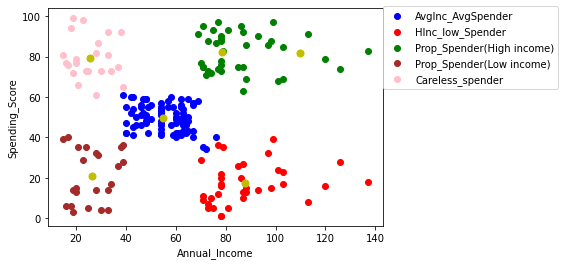

In [24]:
plt.scatter(X1[cluster_labels==0,0] , X1[cluster_labels==0,1], c='Blue',label='AvgInc_AvgSpender' )
plt.scatter(X1[cluster_labels==1,0] , X1[cluster_labels==1,1], c='red' ,label='HInc_low_Spender')
plt.scatter(X1[cluster_labels==2,0] , X1[cluster_labels==2,1], c='green',label='Prop_Spender(High income)')
plt.scatter(X1[cluster_labels==3,0] , X1[cluster_labels==3,1], c='brown',label='Prop_Spender(Low income)')
plt.scatter(X1[cluster_labels==4,0] , X1[cluster_labels==4,1], c='pink' ,label='Careless_spender')

plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],s=50, c='y'     )
plt.xlabel('Annual_Income' )
plt.ylabel('Spending_Score')
plt.legend(loc=(1,.63))
plt.show()

### The targeted customers are 2nd cluster (proportional spender in high income)

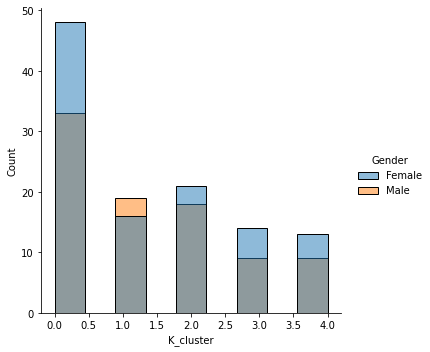

In [25]:
sns.displot(x=M_cust['K_cluster'],hue=M_cust['Gender'])

### More are females customers in this criteria(Target label=2,proportional spender in high income)

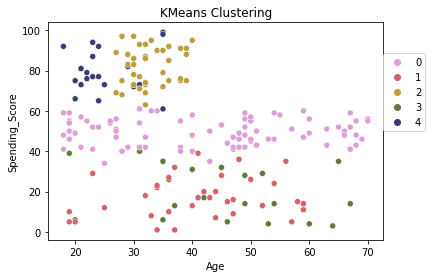

In [26]:
sns.scatterplot(M_cust['Age'],M_cust['Spending_Score'],hue=M_cust['K_cluster'],
                palette='tab20b_r')

plt.title("KMeans Clustering")

plt.legend(loc=(1,0.5));

### Age of targeted customers are b/w 25-40(Target label=2,proportional spender in high income).

### Agglomerative Clustering

#### Plotting to dendogram to get the number of cluster for our model.

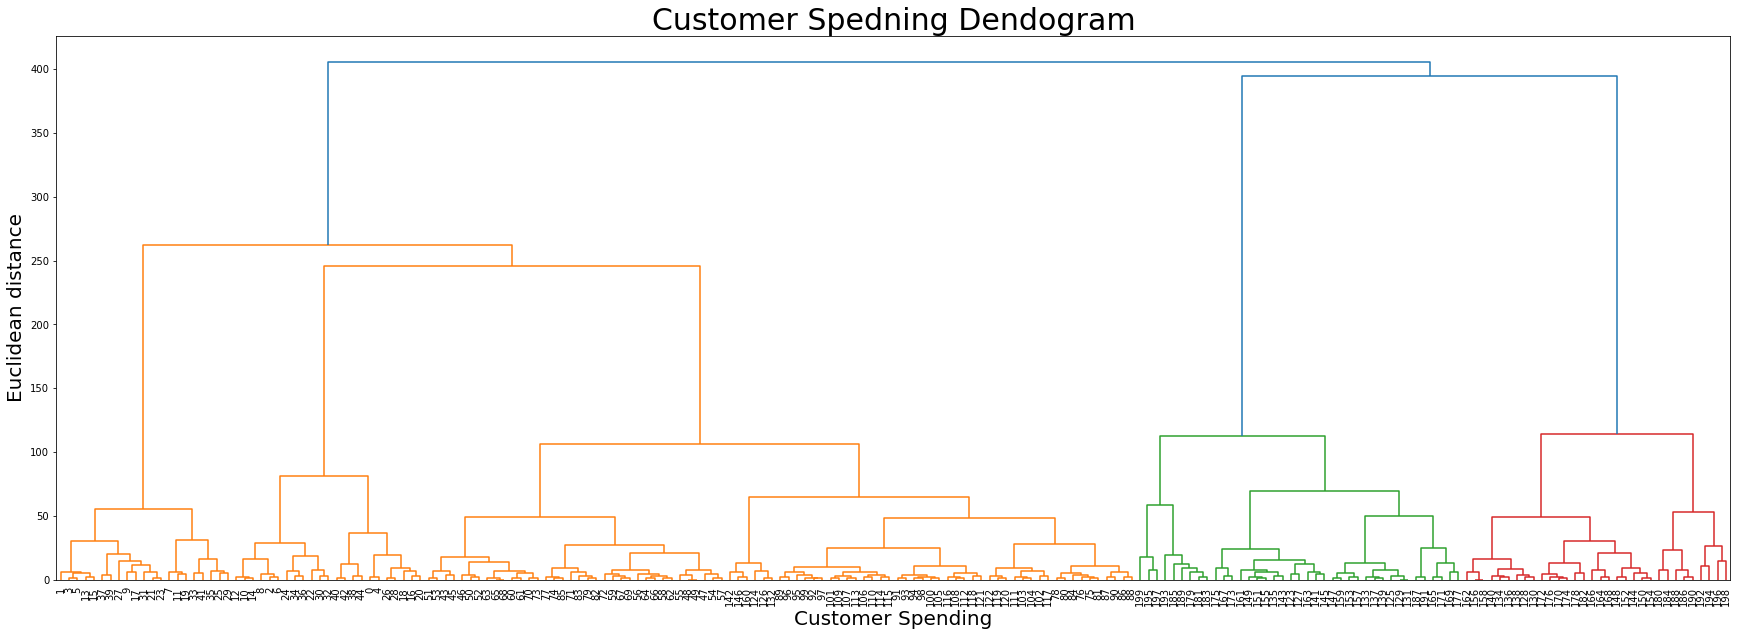

In [27]:
plt.figure(figsize=(30,10))

dendogram=sch.dendrogram(sch.linkage(X1,method='ward'),labels=M_cust.index)

ax=plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Spedning Dendogram',fontsize=30)
plt.xlabel('Customer Spending',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with the maximum distance is the blue line and hence we can decide a threshold of 200 and cut the dendrogram:

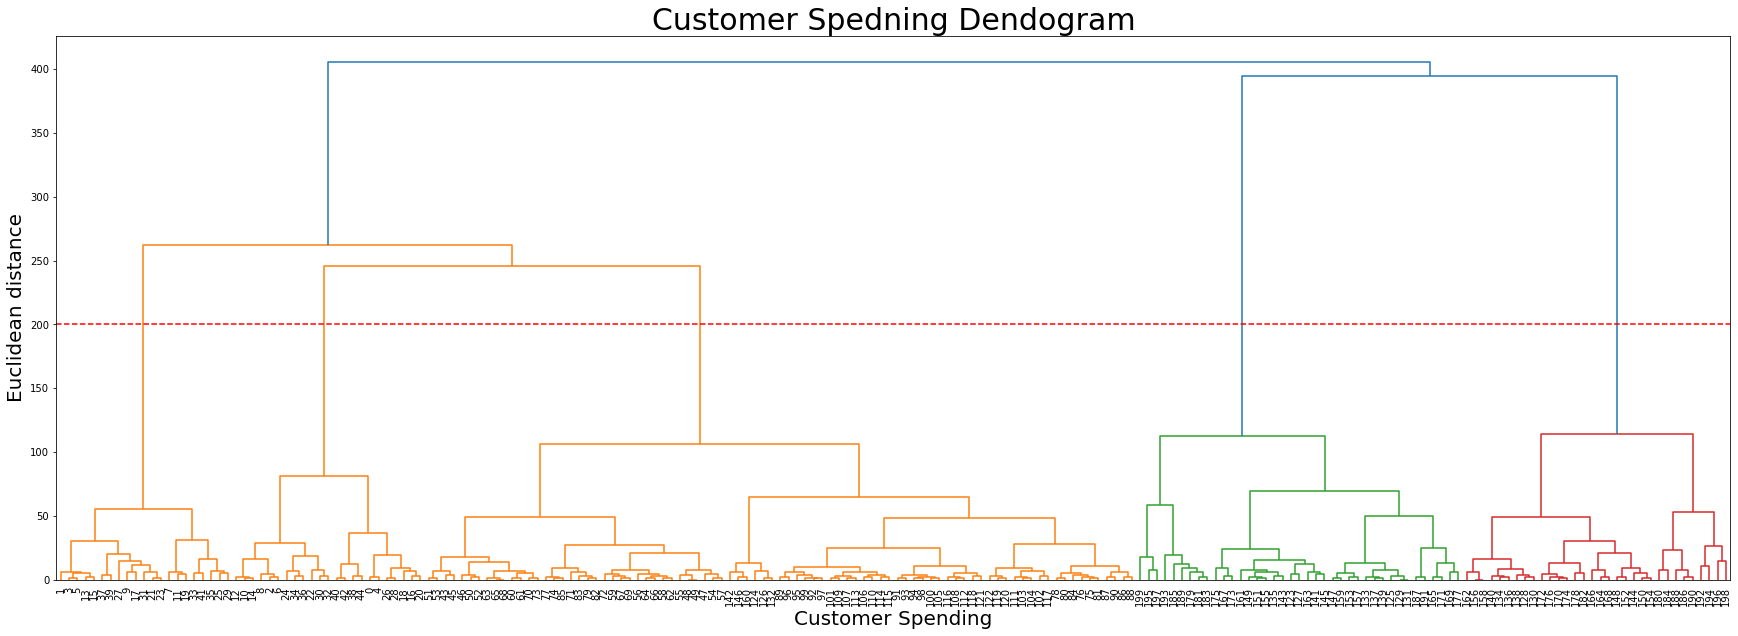

In [28]:
plt.figure(figsize=(30,10))

dendogram=sch.dendrogram(sch.linkage(X1,method='ward'),labels=M_cust.index)
plt.axhline(y=200, color='r', linestyle='--')
ax=plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Spedning Dendogram',fontsize=30)
plt.xlabel('Customer Spending',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In this case we are getting 5 clusters.

So we will design our agglomerative clustering with 5 cluster.

### Model building and fitting.

In [29]:
Agg_clu=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
Agg_clu.fit(X1)

AgglomerativeClustering(n_clusters=5)

### Prediction by model

In [30]:
cluster_labelsa=Agg_clu.fit_predict(X1)
M_cust['Ag_cluster']=cluster_labelsa

### Silhouette Score

In [31]:
silhouette_avg = silhouette_score(X1, cluster_labelsa)
print("For n_clusters =", 5,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.5529945955148897


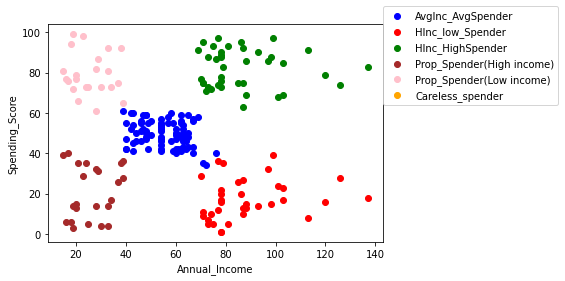

In [32]:
plt.scatter(X1[cluster_labels==0,0] , X1[cluster_labels==0,1], c='Blue',label='AvgInc_AvgSpender' )
plt.scatter(X1[cluster_labels==1,0] , X1[cluster_labels==1,1], c='red' ,label='HInc_low_Spender')
plt.scatter(X1[cluster_labels==2,0] , X1[cluster_labels==2,1], c='green',label='HInc_HighSpender')
plt.scatter(X1[cluster_labels==3,0] , X1[cluster_labels==3,1], c='brown',label='Prop_Spender(High income)')
plt.scatter(X1[cluster_labels==4,0] , X1[cluster_labels==4,1], c='pink' ,label='Prop_Spender(Low income)')
plt.scatter(X1[cluster_labels==5,0] , X1[cluster_labels==5,1], c='orange' ,label='Careless_spender')

plt.xlabel('Annual_Income' )
plt.ylabel('Spending_Score')
plt.legend(loc=(1,.63))
plt.show()

### The targeted customers are 2nd cluster (High income high spender) and 3rd cluster (proportional spender in high income)

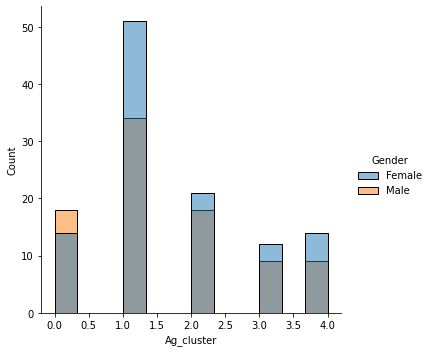

In [33]:
sns.displot(x=M_cust['Ag_cluster'],hue=M_cust['Gender'])

### More are females customers in this criteria(Target label=2 and 3,proportional spender in high income and High income_high_spender).

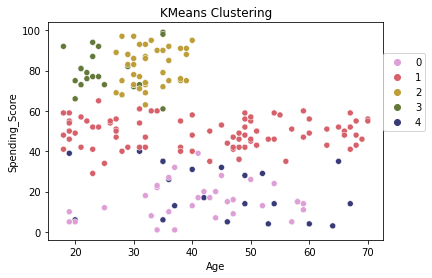

In [34]:
sns.scatterplot(M_cust['Age'],M_cust['Spending_Score'],hue=M_cust['Ag_cluster'],
                palette='tab20b_r')
plt.title("KMeans Clustering")

plt.legend(loc=(1,0.5));

### Age of targeted customers are b/w 20-40(Target label=2 and 3,proportional spender in high income and High income_high_spender).

### DBSCAN Clustering

#### Finding optimum hyperparameter values

In [35]:
from sklearn.neighbors import NearestNeighbors  #importing required library
neighbor=NearestNeighbors(n_neighbors=2)
nearn=neighbor.fit(X1)
distance ,indices=nearn.kneighbors(X1)

In [36]:
distance=np.sort(distance,axis=0)
distance=distance[:,1]

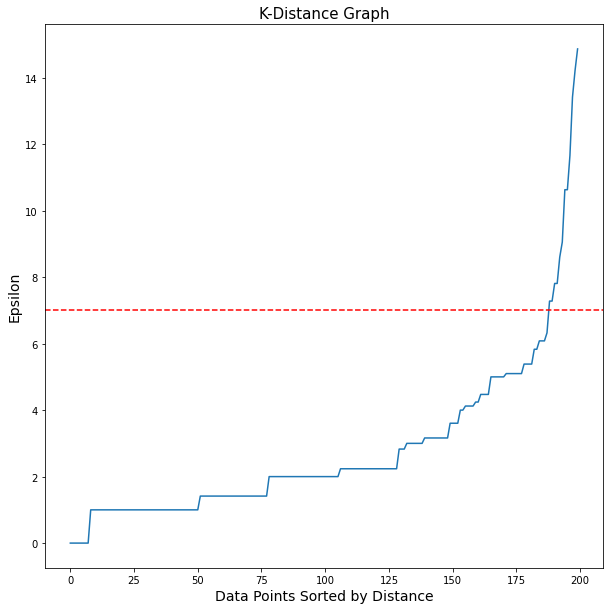

In [37]:
#Finding optimum epsilon value for alogrithm
plt.figure(figsize=(10,10))
plt.plot(distance)
plt.axhline(y=7.0,color='r',linestyle='--')
plt.title('K-Distance Graph',fontsize=15)
plt.xlabel('Data Points Sorted by Distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [38]:
eps=7

for min_samples in range(1,15):
    dbscan=DBSCAN(eps=eps,min_samples=min_samples)
    cluster_labelsd=dbscan.fit_predict(X1)
    
    x=cluster_labelsd + 2
    y=np.bincount(x)
    ii=np.nonzero(y)[0]
    result=list(zip(ii,y[ii]))
    print('eps:',eps,'| min samples :',min_samples,'| obtained clustering:',result)


eps: 7 | min samples : 1 | obtained clustering: [(2, 7), (3, 12), (4, 6), (5, 3), (6, 3), (7, 3), (8, 5), (9, 1), (10, 2), (11, 87), (12, 28), (13, 14), (14, 12), (15, 4), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]
eps: 7 | min samples : 2 | obtained clustering: [(1, 12), (2, 7), (3, 12), (4, 6), (5, 3), (6, 3), (7, 3), (8, 5), (9, 2), (10, 87), (11, 28), (12, 14), (13, 12), (14, 4), (15, 2)]
eps: 7 | min samples : 3 | obtained clustering: [(1, 16), (2, 12), (3, 6), (4, 7), (5, 3), (6, 3), (7, 3), (8, 5), (9, 87), (10, 28), (11, 14), (12, 12), (13, 4)]
eps: 7 | min samples : 4 | obtained clustering: [(1, 39), (2, 11), (3, 4), (4, 6), (5, 87), (6, 28), (7, 14), (8, 7), (9, 4)]
eps: 7 | min samples : 5 | obtained clustering: [(1, 50), (2, 10), (3, 5), (4, 87), (5, 27), (6, 14), (7, 7)]
eps: 7 | min samples : 6 | obtained clustering: [(1, 69), (2, 9), (3, 81), (4, 10), (5, 12), (6, 13), (7, 6)]
eps: 7 | min samples : 7 | obt

From above we can shortlist min_sample=10 as noise is not so large and evenly distributed cluster

### Model building and fitting.

In [39]:
dbscan_10=DBSCAN(eps=8,min_samples=10)
dbscan_10.fit(X1)

DBSCAN(eps=8, min_samples=10)

### Prediction by Model

In [40]:
cluster_labelsdb=dbscan_10.fit_predict(X1)
M_cust['DB_cluster']=cluster_labelsdb

### Silhouette Score

In [41]:
silhouette_avg = silhouette_score(X1, cluster_labelsdb)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.14684663971513787


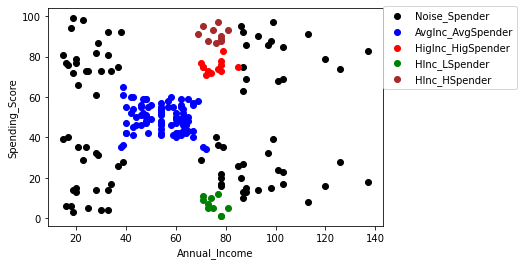

In [42]:
plt.scatter(X1[cluster_labelsdb==-1,0] ,X1[cluster_labelsdb==-1,1], c='Black' ,label='Noise_Spender')
plt.scatter(X1[cluster_labelsdb==0,0] , X1[cluster_labelsdb==0,1], c='Blue',label='AvgInc_AvgSpender' )
plt.scatter(X1[cluster_labelsdb==1,0] , X1[cluster_labelsdb==1,1], c='red' ,label='HigInc_HigSpender')
plt.scatter(X1[cluster_labelsdb==2,0] , X1[cluster_labelsdb==2,1], c='green',label='HInc_LSpender')
plt.scatter(X1[cluster_labelsdb==3,0] , X1[cluster_labelsdb==3,1], c='brown',label='HInc_HSpender')

plt.xlabel('Annual_Income' )
plt.ylabel('Spending_Score')
plt.legend(loc=(1,.63))
plt.show()

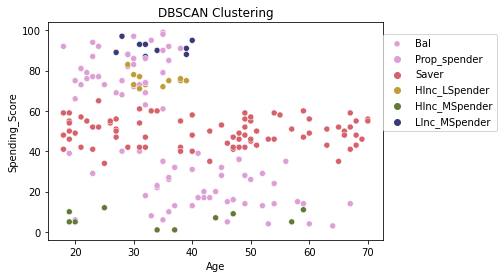

In [43]:
sns.scatterplot(M_cust['Age'],M_cust['Spending_Score'],hue=M_cust['DB_cluster'],
                palette='tab20b_r')

plt.title("DBSCAN Clustering")

plt.legend(loc=(1,0.5),
           labels=['Bal','Prop_spender','Saver','HInc_LSpender','HInc_MSpender','LInc_MSpender']);

## Bussiness Suggestion:

## On the basis of above analysis K-means Clustering is giving the best result,as seen from silhouette score and cluster are well defined.

### Observation:

The targeted customers are 2nd cluster(proportional spender in high income).

More females customers are there in this criteria(Target label=2,proportional spender in high income bracket).

Age of targeted customers are b/w 25-40(Target label=2,proportional spender in high income bracket).

In [65]:
M_cust.iloc[:,[2,3,4,5]].groupby('K_cluster').mean()

,Age,Annual_Income,Spending_Score
K_cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


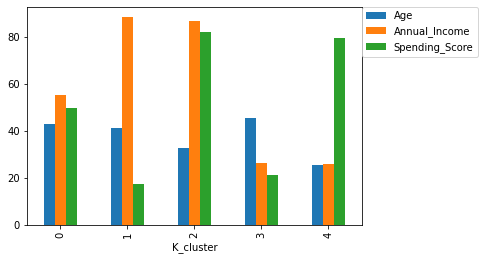

In [64]:
M_cust.iloc[:,[2,3,4,5]].groupby('K_cluster').mean().plot(kind='bar')
plt.legend(loc=(1,0.77));

### Observations:

a.Cluster '0' is Having average salary and have average spending score(Proportional Spender-Average Income).

b.Cluster '1' is High average salary but  have low spending score(High Income Low Spender).

c.Cluster '2' is Having average salary and high spending score(Proportional Spender-High Income).

d.Cluster '3' is Having low salary and  low spending score(Proportional Spender-Low Income).

e.Cluster '4' is Having low salary and high spending score(Careless Spender).

In [50]:
M_cust.iloc[:,[2,3,4,5]].groupby('K_cluster').describe()

Age                                                        \
          count       mean        std   min    25%   50%    75%   max   
K_cluster                                                               
0          81.0  42.716049  16.447822  18.0  27.00  46.0  54.00  70.0   
1          35.0  41.114286  11.341676  19.0  34.00  42.0  47.50  59.0   
2          39.0  32.692308   3.728650  27.0  30.00  32.0  35.50  40.0   
3          23.0  45.217391  13.228607  19.0  35.50  46.0  53.50  67.0   
4          22.0  25.272727   5.257030  18.0  21.25  23.5  29.75  35.0   

          Annual_Income             ...               Spending_Score  \
                  count       mean  ...    75%    max          count   
K_cluster                           ...                                
0                  81.0  55.296296  ...  62.00   76.0           81.0   
1                  35.0  88.200000  ...  97.50  137.0           35.0   
2                  39.0  86.538462  ...  95.00  137.0           39.0   
3                  23.0  26.304348  ...  33.00   39.0           23.0   
4                  22.0  25.727273  ...  32.25   39.0           22.0   

                                                                
                mean        std   min   25%   50%    75%   max  
K_cluster                                                       
0          49.518519   6.530909  34.0  44.0  50.0  55.00  61.0  
1          17.114286   9.952154   1.0  10.0  16.0  23.50  39.0  
2          82.128205   9.364489  63.0  74.5  83.0  90.00  97.0  
3          20.913043  13.017167   3.0   9.5  17.0  33.50  40.0  
4          79.363636  10.504174  61.0  73.0  77.0  85.75  99.0  

[5 rows x 24 columns]